# Pentautan ke Google Drive

In [ ]:
 from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Import Library

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152V2
from sklearn.metrics import confusion_matrix ,accuracy_score,recall_score,precision_score,f1_score
from keras import optimizers
from tensorflow.keras import optimizers
import numpy as np
from sklearn.metrics import classification_report
from sklearn import metrics
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Import Datasets

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
        validation_split=0.1) # menentukan jumlah persentase data validasi sebesar 40% dari total dataset

train_generator = train_datagen.flow_from_directory(
        '/content/gdrive/My Drive/Tubes_MatkulAI/Dataset_new/',target_size=(128,128),color_mode='rgb',batch_size=30,shuffle=True,
        subset='training') # gunakan subset untuk menandai set data bertugas sebagai set data train

validation_generator = train_datagen.flow_from_directory(
        '/content/gdrive/My Drive/Tubes_MatkulAI/Dataset_new/',batch_size=64,shuffle=False,target_size=(128,128), # sama dengan train generator
        subset='validation') # gunakan subset untuk menandai set data bertugas sebagai set data validation


Found 2753 images belonging to 2 classes.
Found 305 images belonging to 2 classes.


# Pembuatan Model ResNet152

In [ ]:
# load the ResNet152V2 pretrained model
baseModel = ResNet152V2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(128, 128, 3)))

# construct the new head of the model
headModel = baseModel.output 
headModel = AveragePooling2D(pool_size=(4, 4))(headModel) # input layer
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel) # hidden layer
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel) # output layer


# place the new head model on top of the base model
model = Model(inputs=baseModel.input, outputs=headModel)

# freeze the base model
for layer in baseModel.layers:
	layer.trainable = False

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 66, 66, 64)   0           ['conv1_conv[0][0]']       

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [ ]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.98 and logs.get('val_accuracy') > 0.98):
      self.model.stop_training = True

stopTraining = Callback()

# Pelatihan Model

In [10]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=15,
                    callbacks=[stopTraining])

Epoch 1/15
92/92 [==============================] - 623s 7s/step - loss: 0.4143 - accuracy: 0.8409 - val_loss: 0.2863 - val_accuracy: 0.8787
Epoch 2/15
92/92 [==============================] - 471s 5s/step - loss: 0.2332 - accuracy: 0.9096 - val_loss: 0.2777 - val_accuracy: 0.8951
Epoch 3/15
92/92 [==============================] - 471s 5s/step - loss: 0.1958 - accuracy: 0.9277 - val_loss: 0.2531 - val_accuracy: 0.9213
Epoch 4/15
92/92 [==============================] - 469s 5s/step - loss: 0.1719 - accuracy: 0.9313 - val_loss: 0.2331 - val_accuracy: 0.9344
Epoch 5/15
92/92 [==============================] - 467s 5s/step - loss: 0.1548 - accuracy: 0.9379 - val_loss: 0.2552 - val_accuracy: 0.9246
Epoch 6/15
92/92 [==============================] - 467s 5s/step - loss: 0.1365 - accuracy: 0.9455 - val_loss: 0.2352 - val_accuracy: 0.9410
Epoch 7/15
92/92 [==============================] - 467s 5s/step - loss: 0.1263 - accuracy: 0.9521 - val_loss: 0.2224 - val_accuracy: 0.9344
Epoch 8/15
92

# Prediksi Model

In [11]:
predicts_vectors = model.predict_generator(validation_generator, verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


5/5 [==============================] - 59s 9s/step


# Validasi Model

In [12]:
pred = np.argmax(predicts_vectors,axis=1)

In [13]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer () 

lb.fit(validation_generator.labels)

y_test = lb.transform (validation_generator.labels)
y_pred = lb.transform (pred)

In [14]:
y_true = validation_generator.labels
y_pred = pred

recall = recall_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
acc = accuracy_score(validation_generator.labels, pred)

In [15]:
print(y_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


In [16]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


In [17]:
print('>> Result <<')
print('Acc: {}'.format(acc*100))
print('Recall: {}'.format(recall*100))
print('Precision: {}'.format(precision*100))
print('F1-Acore: {}'.format(f1))

>> Result <<
Acc: 92.78688524590164
Recall: 92.73118279569891
Precision: 93.008658008658
F1-Acore: 0.9276939655172415


In [18]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       150
           1       0.90      0.96      0.93       155

    accuracy                           0.93       305
   macro avg       0.93      0.93      0.93       305
weighted avg       0.93      0.93      0.93       305



In [19]:
def get_confusion_matrix(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    conf = np.zeros((n_classes, n_classes))
    for actual, pred in zip(y_true, y_pred):
        conf[int(actual)][int(pred)] += 1
    return conf.astype('int')

In [20]:
conf = get_confusion_matrix(y_test, y_pred)
conf

array([[134,  16],
       [  6, 149]])

Text(0.5, 15.0, 'Predicted label')

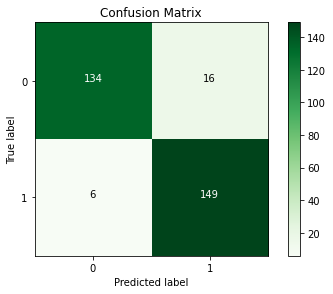

In [21]:
classes = [0, 1]
# plot confusion matrix
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')